In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer



In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No
5879,CUST5879,Female,1,Yes,No,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.45,585.35,Yes


In [8]:
x = df.iloc[:, 3:13].values   # columns: CreditScore to EstimatedSalary
y = df.iloc[:, 13].values

In [9]:
# Label Encoding Gender
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

# One Hot Encoding Geography (avoid dummy trap)
ct = ColumnTransformer(
    [('encoder', OneHotEncoder(drop='first'), [1])],
    remainder='passthrough'
)
x = np.array(ct.fit_transform(x))


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [11]:
df = pd.concat([df], ignore_index=True)

In [12]:
df.drop('MonthlyCharges', axis = 1,inplace = True)

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df['Churn'].value_counts()

Churn
No     2982
Yes    2898
Name: count, dtype: int64

In [15]:
# Encoded the target variables
df['Churn'] = df['Churn'].map({'yes':1, "no":0})

In [16]:
# input and output x,y
x = df.drop('Churn',axis =1)
y = df['Churn']

In [17]:
#Encoding for categorical columns
categorical_cols = x.select_dtypes(include=['object']).columns

In [18]:
x = pd.get_dummies(x, columns = categorical_cols, drop_first = True)

In [19]:
x

,SeniorCitizen,tenure,TotalCharges,customerID_CUST0001,customerID_CUST0002,customerID_CUST0003,customerID_CUST0004,customerID_CUST0005,customerID_CUST0006,customerID_CUST0007,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,23,1146.55,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,0,43,4330.10,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,1,51,4963.83,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,1,72,7299.36,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1,25,1305.50,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,0,71,5268.91,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
5876,0,22,1439.46,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
5877,0,68,4065.04,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
5878,0,14,1286.32,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,True


In [20]:
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
x_train, x_test,y_train,y_test= train_test_split(x_scaled, y, test_size=0.2,random_state= 42)

In [22]:
model = Sequential()
model.add(Dense(32,activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Shree\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# compiling the model
model.compile(loss = "binary_crossentropy", optimizer='SGD', metrics = ['accuracy'])

In [24]:
# training the model
history = model.fit(x_train,y_train,validation_split=0.1,epochs=50,batch_size = 32, verbose=1)

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: nan - v

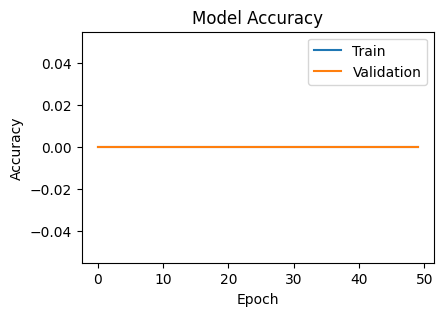

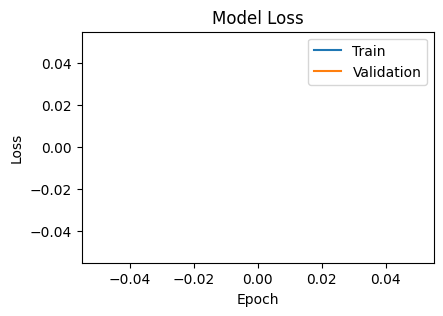

In [25]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()